# Fundamentals of Data Analysis Project - 2018: The Boxplot



## Introduction

In [2]:
import numpy as np
import pandas as pd 
import stemgraphic
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#https://stackoverflow.com/questions/45655321/is-there-a-pandas-function-for-creating-a-stem-and-leaf-plot/45656792#45656792


## Detective and Prosecutor

Tuckey (1977, p.3) uses the analogy of a Detective and a Trial to explain the difference between **Exploratory Data Analysis** (EDA) and traditional confirmatory data analysis (CDA). The detective must investigate the evidence (data) and search for clues (outliers). 

A good detective should have no fixed hypotheses before starting the investigation and should be willing to follow the data where it takes him. He should also be able to examine the evidence as a whole and have the gumption to spot interesting characteristics of the data, such as outliers, trends or clusters. 

The detective provides the evidence and the trial must confirm if it is true or not. The prosecutor makes a hypothesis based on the evidence provided by detective. He tries his (experiment) and the jury is the statistical test, which confirms or rejects the hypothesis (Behrens, 1997, p.131). 

Both EDA and CDA are integral elements of data analysis, but Tuckey emphasised that CDA cannot proceed unless and until EDA has finished finding the evidence. 

## Characteristics of Exploratory Data Analysis 

We have already seen that EDA is the preliminary exploration of the data. I will now explain the 5 major major characteristics of EDA (Behrens, 1997, p.131):

1. **Visualisation of the Data**

2. **Iterative Process**

3. **Robust Statistics**
    
    
    

### Visualisation of Data

Graphical visualisation is the first and most important step in EDA (Tuckey, 1977). John W. Tuckey invented two important plots in his 1977 work *Exploratory Data Analysis*: the stem and leaf plot and the box plot. 

The first step in EDA is to plot all the data points directly, using a stem and leaf plot, a dot plot or similar.  These plots will help the researcher spot the unexpected and, as Tuckey (1977, p.vi) points out: *'The greatest value of a picture is when it forces us to notice what we never expected to see.'* These plots allow one to look at the distribution, the spread, clusters and outliers in the data. 

The second step in graphical representation is summarising the data. If one wants to understand the key characteristics of a dataset or compare the distributions across several, the box plot is particularly suitable (Behrens, 1997, p.136). 





### Iterative Process. 

Behrens (1997, p. 139) notes that the framework of EDA is data = fit + residual or, in graphical terms, data = smooth + rough. 

EDA is a cyclical process whereby a researcher, visualises the data; attempts to fit a model ie. summarise the data; checks for residuals ie. deviations or outliers, and then attempts to improve on the model. 

By iterating through this process, the researcher will come to a good quantitative description of the data. 

Behrens (1997, p. 140) also points out that a box plot is perfect demonstration of the process. It shows the fit of the data (median) as well as the residuals (the variance and outliers).

### Robust Statistics

Finally, when attempting to summarise a dataset, EDA prefers to use numbers from the dataset, eg. the median and min/max instead of the mean. The goal is to accurately describe the fit and the residuals of a dataset and statistics like the mean which can be 'easily fooled' are replaced by the median which is not sensitive to outliers Behrens (1997, p. 143).

Tuckey (1977, p. 34) recommends the **Five Number Summary** as the most appropriate quantitative summary of a dataset. The box plot is the graphical representation of the Five Number Summary. We will look at this in detail next. 




## Five Number Summary

![Box plot: Five Number Summary](https://github.com/dermotkel/fundamentals-project/blob/master/boxplt.jpg?raw=true "Box plot: Five Number Summary")

1. The Minimum is the smallest value in the dataset (0/4)
2. The 2nd Quartile (2QR) is the middle number between the Minimum and the median (1/4)
3. The Median is the middle value of the dataset or the mean of the two middle values if there is no middle number (2/4)
4. The 3rd Quartile (3QR) is the middle number between the median and the maximum (3/4)
5. The Maximum is the highest value in the dataset (4/4)
6. Outliers - values at least 1.5 times the IQR from either hinge.

Tuckey (1977, p. 44) calls the 2QR and and the 3QR 'hinges'. The middle half of the data are contained between the hinges. This is generally referred to as the interquartile range (IQR). Tuckey sets up 'fences' 1.5 times the IQR to the left of the 2QR and to the right of the 3QR. If any value falls outside of these fences, they are regarded as 'far out'. 

These outliers should be treated with suspicion and may be the result of human error or a datapoint from a different dataset.  


 ## Boxplots

As we have seen, a box plot is a graphical representation of the Five Number Summary. A boxplot can provide the key characteristics of a very large dataset in one simple visual representation: The smallest and biggest values, the middle point of the data and its spread.  

In [62]:
th = np.random.normal(100, 20, size=499)
thin = []
for i in th:
 y = np.rint(i)
 thin.append(y)



wi = np.random.normal(150, 50, size=500)
wide = []
for i in wi:
 y = np.rint(i)
 wide.append(y)
    






In [63]:
outlier = np.rint(np.percentile(thin, 75) + (100 + (stats.iqr(thin))*1.5))
thin.append(outlier)

In [64]:
thin = pd.DataFrame(thin)
thin.columns = ['Number']





In [65]:
thin_cat = []
for i in range(500):
    thin_cat.append('thin')

thin_cat = pd.DataFrame(thin_cat, dtype="category")
thin_cat.columns = ['Category']

thin = pd.DataFrame(thin)
thin.columns = ['Number']

thin = thin_cat.join(thin)

wide_cat = []
for i in range(500):
    wide_cat.append('wide')

wide_cat = pd.DataFrame(wide_cat, dtype="category")
wide_cat.columns = ['Category']

wide = pd.DataFrame(wide)
wide.columns = ['Number']

wide = wide_cat.join(wide)


thin_wide = pd.concat([thin, wide])







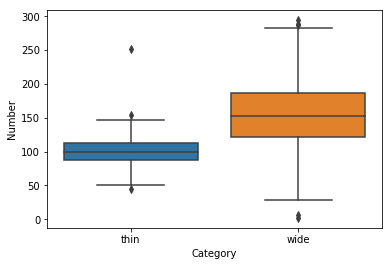

In [66]:
sns.boxplot(data=thin_wide,x="Category",y='Number')


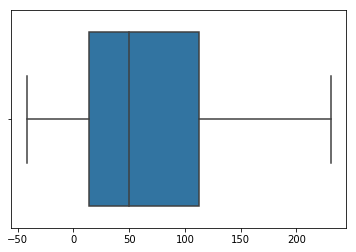

C:\Users\dermotkel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


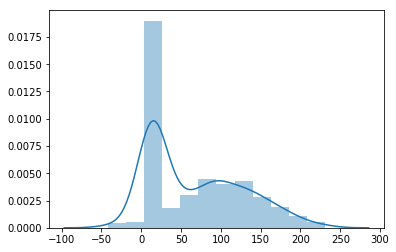

In [106]:
x = np.random.normal(100, 50, size=300)
y = []
for i in x:
 q = np.rint(i)
 y.append(q)

for i in range(200):
    i = np.random.randint(10,20)
    y.append(i)
    

y = pd.Series(y)
    
sns.boxplot(y)
plt.show()

sns.distplot(y)
plt.show()



## Summaries VS. Details

### Stem and Leaf Plot 

In [115]:
x = np.random.normal(20, 20, size=100)
q = []
for i in x:
 y = np.rint(i)
 q.append(y)

 y= pd.Series(q)
print(y)

0      8.0
1     63.0
2     19.0
3      5.0
4     -4.0
5     16.0
6     18.0
7      7.0
8     28.0
9    -24.0
10    11.0
11     2.0
12    25.0
13    65.0
14    33.0
15    42.0
16    -0.0
17   -12.0
18    -4.0
19    50.0
20    33.0
21     3.0
22    32.0
23    31.0
24    66.0
25    13.0
26    15.0
27    32.0
28    -5.0
29    26.0
      ... 
70     9.0
71    20.0
72    32.0
73     6.0
74    19.0
75    21.0
76    59.0
77    -2.0
78   -16.0
79    16.0
80    -3.0
81     9.0
82    -9.0
83    47.0
84    37.0
85    21.0
86    15.0
87    18.0
88    56.0
89    83.0
90    14.0
91    12.0
92     6.0
93    23.0
94    11.0
95    32.0
96     2.0
97    49.0
98    21.0
99    34.0
Length: 100, dtype: float64


C:\Users\dermotkel\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


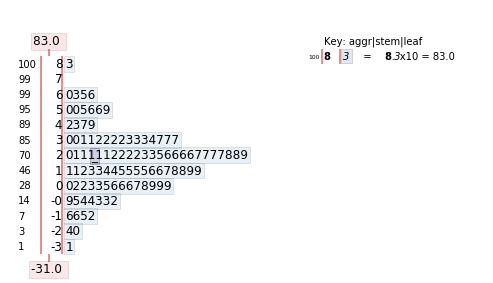

In [116]:
fig, ax = stemgraphic.stem_graphic(y)
plt.savefig('fig.png',bbox_inches='tight') 

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv("https://raw.githubusercontent.com/ireapps/white-house-salaries-2017/master/white_house_2017_salaries.csv")
df.SALARY = df.SALARY.str.strip('$')
df['SALARY'].apply(float)

ValueError: could not convert string to float: '56,000.00 '

In [138]:
df.head()

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
0,"Alexander, Monica K.",Employee,"56,000.00",Per Annum,EXECUTIVE ASSISTANT
1,"Ambrosini, Michael J.",Employee,"95,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...
2,"Amin, Stacy C.",Employee,"140,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...
3,"Andersen, Whitney N.",Employee,"94,000.00",Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...
4,"Anderson, Alexander J.",Employee,"77,000.00",Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT


TypeError: cannot perform reduce with flexible type

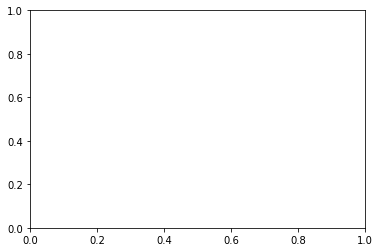

In [139]:
plt.boxplot(df['SALARY'], showmeans=True)
plt.show()

In [120]:
sns.swarmplot(trump['Salary'])
plt.show()

NameError: name 'df' is not defined

In [117]:
sns.distplot(df['Salary'])
plt.show()

NameError: name 'df' is not defined

In [16]:
df.describe()

,Salary,Year
count,377.000000,377.0
mean,94872.000000,2017.0
std,43112.357821,0.0
min,0.000000,2017.0
25%,56000.000000,2017.0
50%,89000.000000,2017.0
75%,119000.000000,2017.0
max,187100.000000,2017.0


In [19]:
119000 - 56000

63000

In [20]:
1.5*63000

94500.0

In [9]:
dinoset = pd.read_table("https://raw.githubusercontent.com/dermotkel/fundamentals-project/master/DatasaurusDozen.tsv")

In [35]:
dinoset

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
5,dino,38.717900,84.871800
6,dino,35.641000,79.871800
7,dino,33.076900,77.564100
8,dino,28.974400,74.487200
9,dino,26.153800,71.410300


In [11]:
dino = dinoset.loc[dinoset['dataset'] == 'dino']

In [36]:
wide_lines = dinoset.loc[dinoset['dataset'] == 'wide_lines']

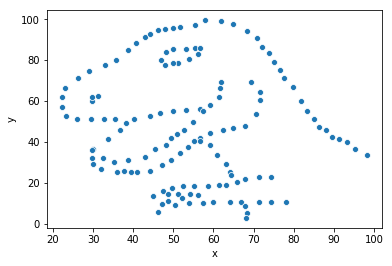

In [13]:
sns.scatterplot(x='x', y='y', data=dino)

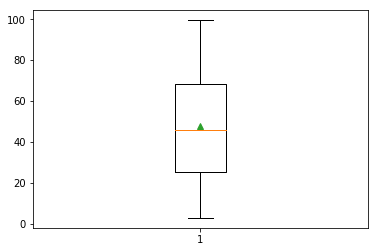

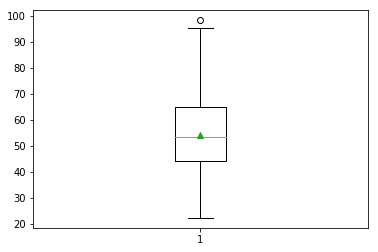

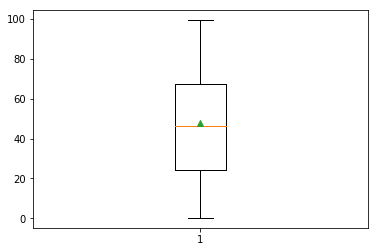

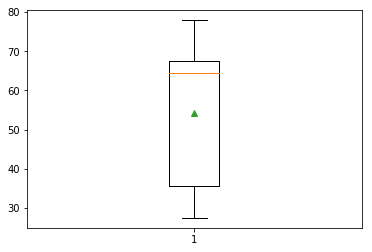

In [42]:
plt.boxplot(dino['y'], showmeans=True)
plt.show()
plt.boxplot(dino['x'], showmeans=True)
plt.show()
plt.boxplot(wide_lines['y'], showmeans=True)
plt.show()
plt.boxplot(wide_lines['x'], showmeans=True)
plt.show()

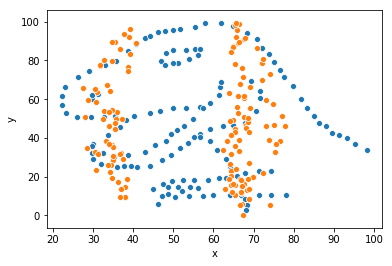

In [38]:
sns.scatterplot(x='x', y='y', data=dino)
sns.scatterplot(x='x', y='y', data=wide_lines)

In [32]:
ans = sns.load_dataset("anscombe")
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [33]:
plt.boxplot(ans['dataset['IV']'], showmeans=True)
plt.show()

SyntaxError: invalid syntax (<ipython-input-33-7726a6911195>, line 1)